**Seasonal Autoregressive Integrated Moving Average (SARIMA)**


- **Definition**: SARIMA is an extension of the ARIMA model that includes seasonal components to account for seasonal variations in time series data, improving predictions for data that exhibits seasonal patterns.

- **First Use in Agriculture**:
  - **Year**: 1980s
  - **Country**: United States
  - **Use**: SARIMA was applied in agriculture to forecast seasonal patterns in crop yields, rainfall, and other agricultural variables.

- **Key Applications in Agriculture**:
  - **Seasonal Crop Yield Predictions**: Forecasting crop yields by considering seasonal variations.
  - **Rainfall Prediction**: Predicting seasonal rainfall patterns for better planning.
  - **Irrigation Planning**: Optimizing irrigation schedules based on seasonal weather and water availability.

## Time Series Forecasting of Crop Yield Using SARIMA: A Synthetic Seasonal Analysis

Data Overview:
--------------------------------------------------
First 5 Rows (df.head()):
            Crop_Yield  Temperature    Rainfall   Humidity  Soil_Moisture
Date                                                                     
2000-01-01   52.483571    23.677950  113.303435  76.208834      37.104027
2000-01-02   49.332745    23.978731  118.904415  76.366593      43.175510
2000-01-03   53.286576    24.103821  103.363877  82.937882      38.017383
2000-01-04   57.687350    25.703812  105.145500  72.122023      38.699582
2000-01-05   48.925500    25.946932   78.771455  73.887301      39.097192

Columns in the Dataset (df.columns):
Index(['Crop_Yield', 'Temperature', 'Rainfall', 'Humidity', 'Soil_Moisture'], dtype='object')

Data Shape (df.shape):
(7300, 5)

Data Summary (df.describe()):
        Crop_Yield  Temperature     Rainfall     Humidity  Soil_Moisture
count  7300.000000  7300.000000  7300.000000  7300.000000    7300.000000
mean     74.970372    25.011042   100.144818   

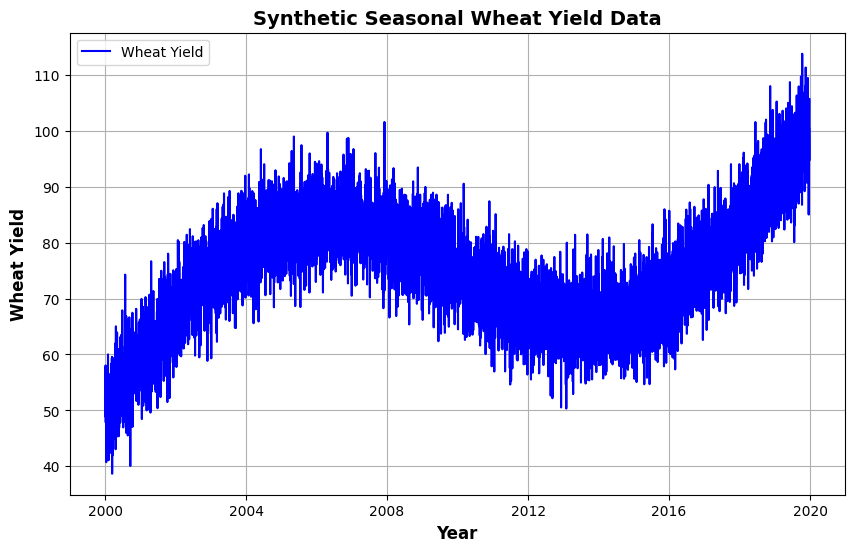

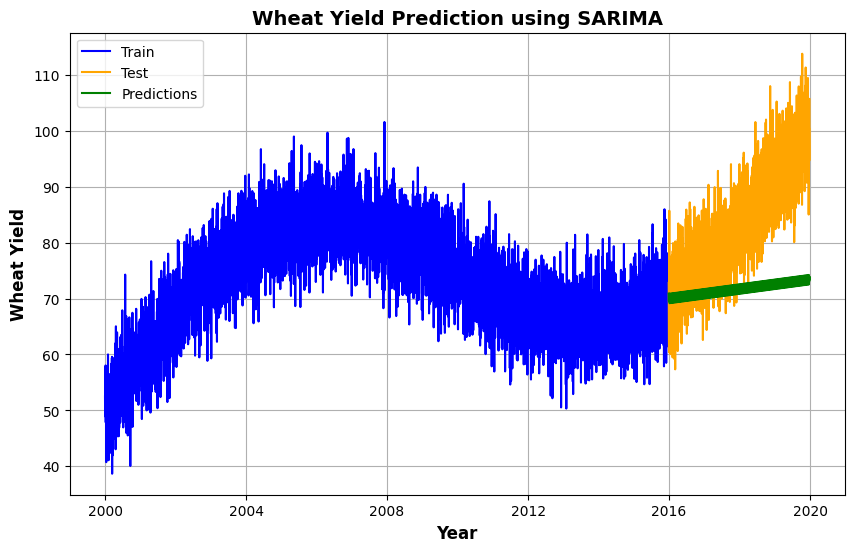

RMSE: 15.293159014529307


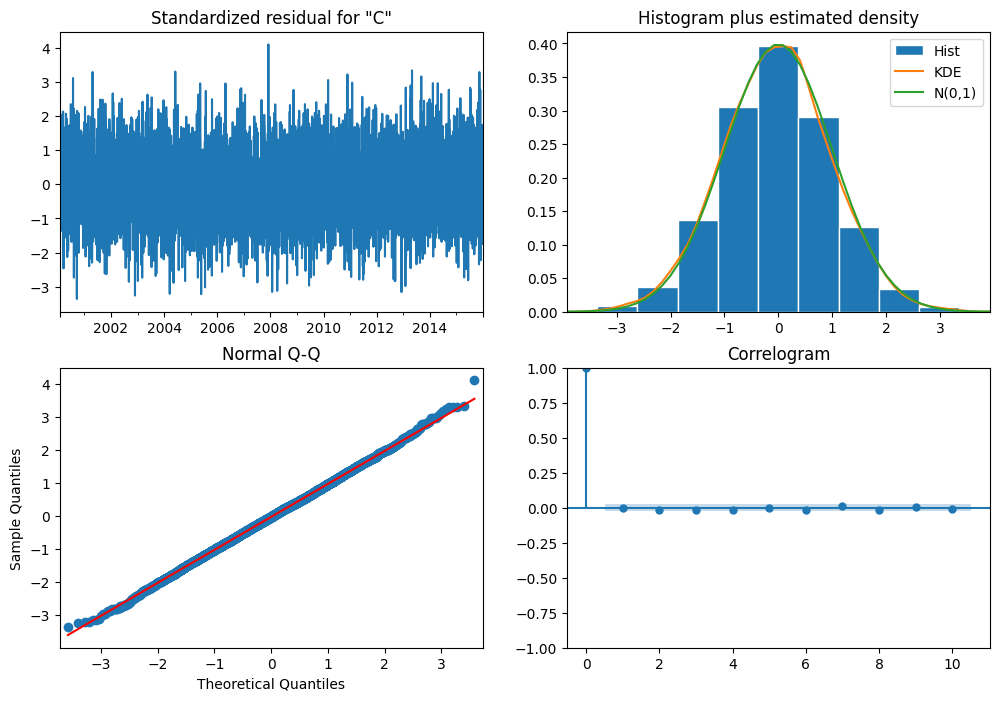

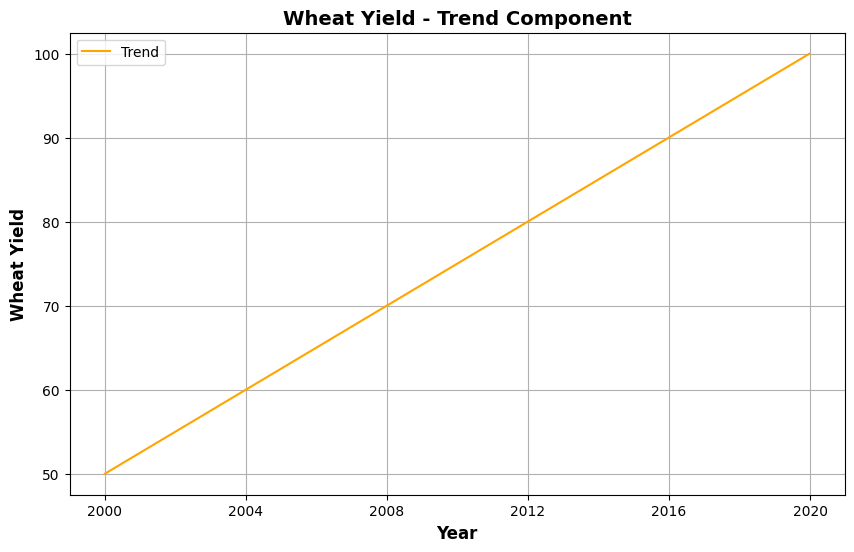

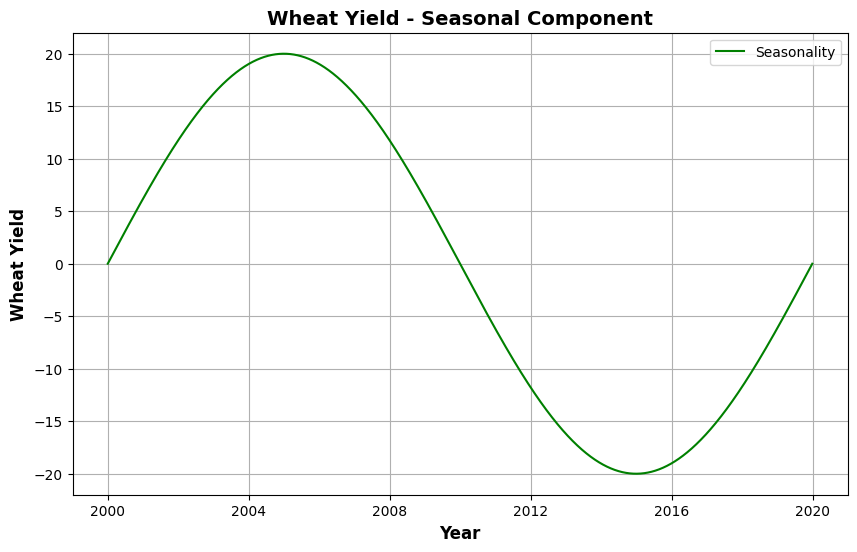

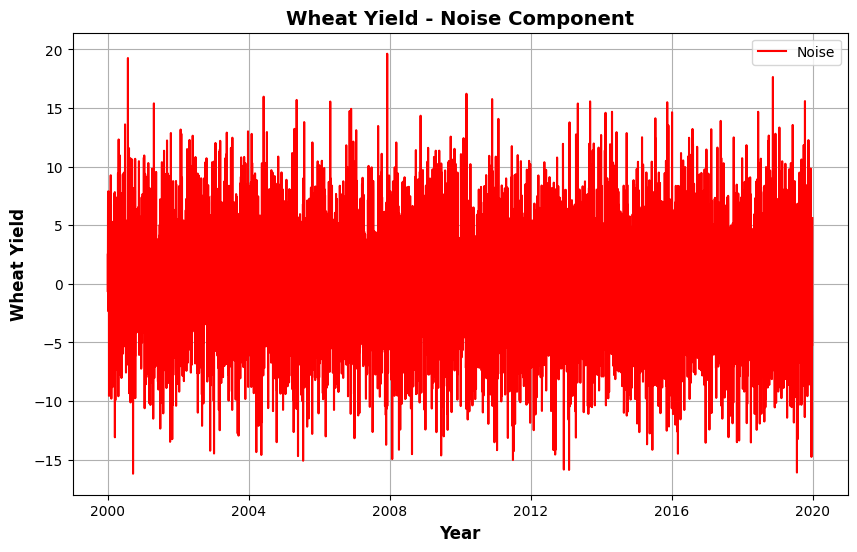


Interpretation and Summary:
--------------------------------------------------
RMSE: 15.293159014529307 - Lower RMSE indicates a better model fit.
SARIMA Model Order: (1, 1, 1), Seasonal Order: (1, 1, 1, 12)
Model captures both trend and seasonality (annual cycles).
Model Diagnostics: Check residuals for white noise behavior, which indicates a good model fit.
--------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
import warnings

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Generate synthetic crop yield data for 20 years (7300 days)
np.random.seed(42)
date_range = pd.date_range(start='2000-01-01', periods=7300, freq='D')
seasonality = 20 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))
trend = np.linspace(50, 100, len(date_range))
noise = np.random.normal(0, 5, len(date_range))
crop_yield = trend + seasonality + noise

# Additional features: Temperature, Rainfall, Humidity, Soil Moisture
temperature = 25 + 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range))) + np.random.normal(0, 2, len(date_range))
rainfall = 100 + 30 * np.sin(np.linspace(0, 2 * np.pi, len(date_range))) + np.random.normal(0, 10, len(date_range))
humidity = 60 + 15 * np.cos(np.linspace(0, 2 * np.pi, len(date_range))) + np.random.normal(0, 5, len(date_range))
soil_moisture = 40 + 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range))) + np.random.normal(0, 3, len(date_range))

# Create DataFrame
data = pd.DataFrame({
    'Date': date_range,
    'Crop_Yield': crop_yield,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Humidity': humidity,
    'Soil_Moisture': soil_moisture
})
data.set_index('Date', inplace=True)

# Initial Data Exploration
print("Data Overview:")
print("-" * 50)
print("First 5 Rows (df.head()):")
print(data.head())
print("\nColumns in the Dataset (df.columns):")
print(data.columns)
print("\nData Shape (df.shape):")
print(data.shape)
print("\nData Summary (df.describe()):")
print(data.describe())
print("-" * 50)

# Plotting crop yield
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Crop_Yield'], label='Wheat Yield', color='b')
plt.title('Synthetic Seasonal Wheat Yield Data', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Wheat Yield', fontsize=12, weight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit SARIMA model
sarima_model = SARIMAX(train['Crop_Yield'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Predictions
predictions = sarima_results.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Plot predictions vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Crop_Yield'], label='Train', color='blue')
plt.plot(test.index, test['Crop_Yield'], label='Test', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.title('Wheat Yield Prediction using SARIMA', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Wheat Yield', fontsize=12, weight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Model Performance (RMSE)
rmse_value = rmse(test['Crop_Yield'], predictions)
print(f'RMSE: {rmse_value}')

# Model Diagnostics
sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Trend Component Plot
plt.figure(figsize=(10, 6))
plt.plot(data.index, trend, label='Trend', color='orange')
plt.title('Wheat Yield - Trend Component', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Wheat Yield', fontsize=12, weight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Seasonal Component Plot
plt.figure(figsize=(10, 6))
plt.plot(data.index, seasonality, label='Seasonality', color='green')
plt.title('Wheat Yield - Seasonal Component', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Wheat Yield', fontsize=12, weight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Noise Component Plot
plt.figure(figsize=(10, 6))
plt.plot(data.index, noise, label='Noise', color='red')
plt.title('Wheat Yield - Noise Component', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Wheat Yield', fontsize=12, weight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation & Summary
print("\nInterpretation and Summary:")
print("-" * 50)
print(f"RMSE: {rmse_value} - Lower RMSE indicates a better model fit.")
print(f"SARIMA Model Order: {sarima_model.order}, Seasonal Order: {sarima_model.seasonal_order}")
print(f"Model captures both trend and seasonality (annual cycles).")
print(f"Model Diagnostics: Check residuals for white noise behavior, which indicates a good model fit.")
print("-" * 50)
